## Установка PySpark

In [1]:
!apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,911 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,526 kB]
Get:13 https://developer.download.nvidia.com/compute/cuda/

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
!wget -q https://archive.apache.org/dist/spark/spark-3.5.4/spark-3.5.4-bin-hadoop3.tgz

In [4]:
!tar -xvf spark-3.5.4-bin-hadoop3.tgz

spark-3.5.4-bin-hadoop3/
spark-3.5.4-bin-hadoop3/R/
spark-3.5.4-bin-hadoop3/R/lib/
spark-3.5.4-bin-hadoop3/R/lib/SparkR/
spark-3.5.4-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.5.4-bin-hadoop3/R/lib/SparkR/R/
spark-3.5.4-bin-hadoop3/R/lib/SparkR/R/SparkR
spark-3.5.4-bin-hadoop3/R/lib/SparkR/R/SparkR.rdb
spark-3.5.4-bin-hadoop3/R/lib/SparkR/R/SparkR.rdx
spark-3.5.4-bin-hadoop3/R/lib/SparkR/NAMESPACE
spark-3.5.4-bin-hadoop3/R/lib/SparkR/profile/
spark-3.5.4-bin-hadoop3/R/lib/SparkR/profile/shell.R
spark-3.5.4-bin-hadoop3/R/lib/SparkR/profile/general.R
spark-3.5.4-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.5.4-bin-hadoop3/R/lib/SparkR/doc/
spark-3.5.4-bin-hadoop3/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.5.4-bin-hadoop3/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.5.4-bin-hadoop3/R/lib/SparkR/doc/index.html
spark-3.5.4-bin-hadoop3/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.5.4-bin-hadoop3/R/lib/SparkR/html/
spark-3.5.4-bin-hadoop3/R/lib/SparkR/html/00Index.html
spark-3.5.4-bin-hadoop3

In [5]:
!pip install -q findspark

In [7]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.4-bin-hadoop3"

In [8]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

## Работа с RDD

In [9]:
words = sc.parallelize (
   ["scala",
   "java",
   "hadoop",
   "spark",
   "akka",
   "spark",
   "hadoop",
   "pyspark",
   "bigdata",
    "python"]
)

In [10]:
words

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

In [11]:
words.count()

10

In [12]:
def mapper(w):
  return (w, 1)

In [13]:
words.map(mapper)

PythonRDD[2] at RDD at PythonRDD.scala:53

In [14]:
transform = words.map(mapper)

In [15]:
transform.collect()

[('scala', 1),
 ('java', 1),
 ('hadoop', 1),
 ('spark', 1),
 ('akka', 1),
 ('spark', 1),
 ('hadoop', 1),
 ('pyspark', 1),
 ('bigdata', 1),
 ('python', 1)]

In [16]:
def reducer(a, b):
  return a + b

In [17]:
transform.reduceByKey(reducer)

PythonRDD[8] at RDD at PythonRDD.scala:53

In [18]:
transform = transform.reduceByKey(reducer)

In [19]:
transform.collect()

[('java', 1),
 ('hadoop', 2),
 ('akka', 1),
 ('python', 1),
 ('scala', 1),
 ('spark', 2),
 ('pyspark', 1),
 ('bigdata', 1)]

## DataFrame

In [21]:
df = spark.read.csv('power.csv', inferSchema=True, header=True)

In [22]:
## Обзор

In [23]:
df.count()

1189482

In [24]:
df.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('quantity', 'double'),
 ('category', 'int')]

In [25]:
df.take(2)

[Row(country='Austria', year=1996, quantity=5.0, category=1),
 Row(country='Austria', year=1995, quantity=17.0, category=1)]

## Практика 1. Загрузите данные из файла transactions.csv. Выведите 10 первых строчек

In [26]:
df_practice = spark.read.csv('transactions.csv', inferSchema = True, header = True)

In [27]:
df_practice.take(10)

[Row(Year=2017, Month=1, ID='t001', Product='A1', Amount=7, Price=2904, Total=20328, Cost=1200),
 Row(Year=2017, Month=1, ID='t002', Product='A2', Amount=2, Price=1896, Total=3792, Cost=1100),
 Row(Year=2017, Month=2, ID='t003', Product='A1', Amount=5, Price=2904, Total=14520, Cost=1200),
 Row(Year=2017, Month=2, ID='t004', Product='A4', Amount=1, Price=8618, Total=8618, Cost=4200),
 Row(Year=2017, Month=2, ID='t005', Product='A5', Amount=3, Price=5175, Total=15525, Cost=500),
 Row(Year=2017, Month=2, ID='t006', Product='_6', Amount=4, Price=3500, Total=14000, Cost=200),
 Row(Year=2017, Month=3, ID='t007', Product='_3', Amount=6, Price=1265, Total=7590, Cost=200),
 Row(Year=2017, Month=3, ID='t008', Product='_5', Amount=2, Price=5175, Total=10350, Cost=1200),
 Row(Year=2017, Month=4, ID='t009', Product='_8', Amount=3, Price=3760, Total=11280, Cost=1000),
 Row(Year=2017, Month=4, ID='t010', Product='_4', Amount=2, Price=8618, Total=17236, Cost=3400)]

In [28]:
# Выборки

In [29]:
df_lim = df.select('country', 'year', 'quantity')
df_lim.take(1)

[Row(country='Austria', year=1996, quantity=5.0)]

In [30]:
df_lim = df_lim.withColumnRenamed('year', 'y')
df_lim

DataFrame[country: string, y: int, quantity: double]

In [31]:
df_lim.columns

['country', 'y', 'quantity']

In [ ]:
## Описание и статистики

In [32]:
df_lim.show()

+-------+----+--------+
|country|   y|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [33]:
df_lim.describe().show()

+-------+-----------+------------------+--------------------+
|summary|    country|                 y|            quantity|
+-------+-----------+------------------+--------------------+
|  count|    1189482|           1189482|             1189482|
|   mean|       NULL|2002.8515538696677|  184264.77005012735|
| stddev|       NULL| 7.167344581291499|1.5856628141359948E7|
|    min|Afghanistan|              1990|           -864348.0|
|    max|   Zimbabwe|              2014|          6.680329E9|
+-------+-----------+------------------+--------------------+



In [ ]:
## Сохранение

In [34]:
df_lim.write.format('com.databricks.spark.csv').option('header', 'true').save('df_lim.csv')

In [ ]:
## Вычисления

In [36]:
df_lim = df_lim.withColumn('quantity x 2', df_lim['quantity'] * 2)
df_lim.take(2)

[Row(country='Austria', y=1996, quantity=5.0, quantity x 2=10.0),
 Row(country='Austria', y=1995, quantity=17.0, quantity x 2=34.0)]

In [45]:
df_grp = df_lim.groupBy('country')

In [46]:
df_sum = df_grp.sum('quantity', 'quantity x 2')

In [47]:
df_sum.show()

+------------------+--------------------+--------------------+
|           country|       sum(quantity)|   sum(quantity x 2)|
+------------------+--------------------+--------------------+
|     Côte d'Ivoire| 2.815485732456253E7| 5.630971464912506E7|
|              Chad|  3796498.7491319943|   7592997.498263989|
|          Paraguay|     1.23209483765E7|      2.4641896753E7|
|          Anguilla|   20529.34999999997|   41058.69999999994|
|             Yemen|1.8178937740390217E8|3.6357875480780435E8|
|State of Palestine|  1318668.0123446316|   2637336.024689263|
|           Senegal|   6944395.348079733|1.3888790696159465E7|
|            Sweden|1.3456236759933385E8| 2.691247351986677E8|
|        Cabo Verde|   88130.27080000004|  176260.54160000008|
|          Kiribati|   6450.091429000002|  12900.182858000004|
|            Guyana|   772150.6722661877|  1544301.3445323755|
|       Philippines|  8.45277094530091E7| 1.690554189060182E8|
|           Eritrea|   918454.1476713057|  1836908.2953

In [ ]:
## Свободные таблицы

In [48]:
df_lim.groupby('country').pivot('y').sum('quantity').show()

+------------------+--------------------+------------------+------------------+--------------------+------------------+--------------------+------------------+--------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+
|           country|                1990|              1991|              1992|                1993|              1994|                1995|              1996|                1997|              1998|              1999|              2000|              2001|              2002|                2003|                2004|                2005|                2006|                2007|                2008|                2009|                2010|               2011|          

## Практика 2. Выведите максимальную и минимальную (2 датафрейма) количество (Amount) по продукту

In [54]:
df_practice.show()

+----+-----+----+-------+------+-----+-----+----+
|Year|Month|  ID|Product|Amount|Price|Total|Cost|
+----+-----+----+-------+------+-----+-----+----+
|2017|    1|t001|     A1|     7| 2904|20328|1200|
|2017|    1|t002|     A2|     2| 1896| 3792|1100|
|2017|    2|t003|     A1|     5| 2904|14520|1200|
|2017|    2|t004|     A4|     1| 8618| 8618|4200|
|2017|    2|t005|     A5|     3| 5175|15525| 500|
|2017|    2|t006|     _6|     4| 3500|14000| 200|
|2017|    3|t007|     _3|     6| 1265| 7590| 200|
|2017|    3|t008|     _5|     2| 5175|10350|1200|
|2017|    4|t009|     _8|     3| 3760|11280|1000|
|2017|    4|t010|     _4|     2| 8618|17236|3400|
|2017|    4|t011|     _2|     4| 1896| 7584| 800|
|2017|    4|t012|     _5|     5| 5175|25875| 700|
|2017|    4|t013|     _8|     3| 3760|11280|1200|
|2017|    4|t014|     _4|     1| 8618| 8618| 250|
|2017|    5|t015|     _2|     2| 1896| 3792| 650|
|2017|    5|t016|     A4|     3| 8618|25854|2400|
|2017|    5|t017|     A5|     2| 5175|10350|1200|


In [50]:
df_pr_max = df_practice.groupby('Product').max('Amount')
df_pr_max.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [51]:
df_pr_min = df_practice.groupby('Product').min('Amount')
df_pr_min.show()

+-------+-----------+
|Product|min(Amount)|
+-------+-----------+
|     _5|          1|
|     _2|          1|
|     A2|          2|
|     _8|          1|
|     _3|          2|
|     _4|          1|
|     _6|          4|
|     A4|          1|
|     A5|          2|
|     A1|          2|
+-------+-----------+



In [ ]:
## Подвыборки

In [56]:
df.show(10)

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
|Belgium|2011|    25.0|       1|
|Belgium|2010|    22.0|       1|
|Belgium|2009|    45.0|       1|
|Czechia|1998|     1.0|       1|
|Czechia|1995|     7.0|       1|
+-------+----+--------+--------+
only showing top 10 rows



In [55]:
df['quantity'] > 184264

Column<'(quantity > 184264)'>

In [57]:
df.where((df['quantity'] > 184264)).show()

+-------------+----+--------+--------+
|      country|year|quantity|category|
+-------------+----+--------+--------+
|United States|2014|367987.0|       2|
|United States|2013|384439.0|       2|
|United States|2012|370625.0|       2|
|United States|2011|310909.0|       2|
|United States|2010|335418.0|       2|
|United States|2009|230589.0|       2|
|United States|2008|226570.0|       2|
|United States|2007|221771.0|       2|
|United States|2005|314655.0|       2|
|United States|2004|243916.0|       2|
|United States|1996|226319.0|       2|
|United States|1995|292568.0|       2|
|United States|1994|230254.0|       2|
|United States|1993|247909.0|       2|
|United States|2014|448216.0|       2|
|United States|2013|458711.0|       2|
|United States|2012|433505.0|       2|
|United States|2011|382566.0|       2|
|United States|2010|406606.0|       2|
|United States|2009|296903.0|       2|
+-------------+----+--------+--------+
only showing top 20 rows



In [58]:
df_filter = df.where((df['quantity'] > 184264) & (df['country'] != 'United States'))
df_filter.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
| Canada|2013|191861.0|      10|
| Canada|2007|202060.0|      10|
| Canada|2006|203142.0|      10|
| Canada|2005|224001.0|      10|
| Canada|2004|236803.0|      10|
| Canada|2003|226291.0|      10|
+-------+----+--------+--------+
only showing top 20 rows



# Практика 3. Выведите список всех, товаров, которых хоть когда-то было больше 5-ти штук


In [60]:
df_practice.show()

+----+-----+----+-------+------+-----+-----+----+
|Year|Month|  ID|Product|Amount|Price|Total|Cost|
+----+-----+----+-------+------+-----+-----+----+
|2017|    1|t001|     A1|     7| 2904|20328|1200|
|2017|    1|t002|     A2|     2| 1896| 3792|1100|
|2017|    2|t003|     A1|     5| 2904|14520|1200|
|2017|    2|t004|     A4|     1| 8618| 8618|4200|
|2017|    2|t005|     A5|     3| 5175|15525| 500|
|2017|    2|t006|     _6|     4| 3500|14000| 200|
|2017|    3|t007|     _3|     6| 1265| 7590| 200|
|2017|    3|t008|     _5|     2| 5175|10350|1200|
|2017|    4|t009|     _8|     3| 3760|11280|1000|
|2017|    4|t010|     _4|     2| 8618|17236|3400|
|2017|    4|t011|     _2|     4| 1896| 7584| 800|
|2017|    4|t012|     _5|     5| 5175|25875| 700|
|2017|    4|t013|     _8|     3| 3760|11280|1200|
|2017|    4|t014|     _4|     1| 8618| 8618| 250|
|2017|    5|t015|     _2|     2| 1896| 3792| 650|
|2017|    5|t016|     A4|     3| 8618|25854|2400|
|2017|    5|t017|     A5|     2| 5175|10350|1200|


In [77]:
df_practice.where((df_practice['Amount'] > 5)).select('Product').distinct().show()

+-------+
|Product|
+-------+
|     _5|
|     _2|
|     _8|
|     _3|
|     A5|
|     A1|
+-------+



In [78]:
df_pr_max.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [81]:
df_pr_max.where((df_pr_max['max(Amount)'] > 5)).show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     _8|         10|
|     _3|          7|
|     A5|          7|
|     A1|          9|
+-------+-----------+



## SQL

In [82]:
df.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
|Belgium|2011|    25.0|       1|
|Belgium|2010|    22.0|       1|
|Belgium|2009|    45.0|       1|
|Czechia|1998|     1.0|       1|
|Czechia|1995|     7.0|       1|
|Finland|2010|     9.0|       1|
|Finland|2009|    13.0|       1|
|Finland|2008|    39.0|       1|
|Finland|2007|    21.0|       1|
|Finland|2006|     0.0|       1|
|Finland|2005|     0.0|       1|
|Finland|2004|     0.0|       1|
|Finland|2003|     0.0|       1|
|Finland|2002|     0.0|       1|
|Finland|2001|     0.0|       1|
+-------+----+--------+--------+
only showing top 20 rows



In [83]:
df.createOrReplaceTempView('power')

In [84]:
spark.sql('SELECT * FROM power').show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
|Belgium|2011|    25.0|       1|
|Belgium|2010|    22.0|       1|
|Belgium|2009|    45.0|       1|
|Czechia|1998|     1.0|       1|
|Czechia|1995|     7.0|       1|
|Finland|2010|     9.0|       1|
|Finland|2009|    13.0|       1|
|Finland|2008|    39.0|       1|
|Finland|2007|    21.0|       1|
|Finland|2006|     0.0|       1|
|Finland|2005|     0.0|       1|
|Finland|2004|     0.0|       1|
|Finland|2003|     0.0|       1|
|Finland|2002|     0.0|       1|
|Finland|2001|     0.0|       1|
+-------+----+--------+--------+
only showing top 20 rows



In [85]:
spark.sql('SELECT country, sum(quantity) FROM power GROUP BY country').show()

+------------------+--------------------+
|           country|       sum(quantity)|
+------------------+--------------------+
|     Côte d'Ivoire| 2.815485732456253E7|
|              Chad|  3796498.7491319943|
|          Paraguay|     1.23209483765E7|
|          Anguilla|   20529.34999999997|
|             Yemen|1.8178937740390217E8|
|State of Palestine|  1318668.0123446316|
|           Senegal|   6944395.348079733|
|            Sweden|1.3456236759933385E8|
|        Cabo Verde|   88130.27080000004|
|          Kiribati|   6450.091429000002|
|            Guyana|   772150.6722661877|
|       Philippines|  8.45277094530091E7|
|           Eritrea|   918454.1476713057|
|            Jersey|  142744.73085845588|
|             Tonga|  16350.450516472933|
|          Djibouti|  130946.11799999996|
|         Singapore| 4.701454062703839E7|
|          Malaysia| 8.356959770425016E8|
|              Fiji|  400739.80509911076|
|            Turkey| 3.500108256564667E8|
+------------------+--------------

In [86]:
## Соединение
from pyspark.sql import Row

In [87]:
row1 = Row("name", "pet", "count")
row2 = Row("name", "pet2", "count2")

In [89]:
df1 = sc.parallelize([
    row1("Sue", "cat", 16),
    row1("Kim", "dog", 1),
    row1("Bob", "fish", 5),
    row1("Libuse", "horse", 1)
    ]).toDF()

df2 = sc.parallelize([
    row2("Sue", "eagle", 2),
    row2("Kim", "ant", 179),
    row2("Bob", "lizard", 5),
    row2("Ferdinand", "bees", 23)
    ]).toDF()

In [90]:
df1.show()

+------+-----+-----+
|  name|  pet|count|
+------+-----+-----+
|   Sue|  cat|   16|
|   Kim|  dog|    1|
|   Bob| fish|    5|
|Libuse|horse|    1|
+------+-----+-----+



In [91]:
df2.show()

+---------+------+------+
|     name|  pet2|count2|
+---------+------+------+
|      Sue| eagle|     2|
|      Kim|   ant|   179|
|      Bob|lizard|     5|
|Ferdinand|  bees|    23|
+---------+------+------+



In [97]:
df1.join(df2, 'name', how='inner').show()

+----+----+-----+------+------+
|name| pet|count|  pet2|count2|
+----+----+-----+------+------+
| Bob|fish|    5|lizard|     5|
| Kim| dog|    1|   ant|   179|
| Sue| cat|   16| eagle|     2|
+----+----+-----+------+------+



## Практика 4. При помощи операции соединения выведите максимальное, минимальное и среднее (avg) количество (Amount) по продукту

In [98]:
df_pr_max.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [102]:
df_pr_min_max = df_pr_max.join(df_pr_min, on = 'Product', how = 'outer')
df_pr_avg = df_practice.groupby('Product').avg('Amount')
df_pr_min_max.join(df_pr_avg, on = 'Product', how = 'inner').show()

+-------+-----------+-----------+------------------+
|Product|max(Amount)|min(Amount)|       avg(Amount)|
+-------+-----------+-----------+------------------+
|     A1|          9|          2|               5.6|
|     A2|          2|          2|               2.0|
|     A4|          3|          1|               2.0|
|     A5|          7|          2|               4.0|
|     _2|          8|          1|              4.75|
|     _3|          7|          2| 4.285714285714286|
|     _4|          3|          1|               2.0|
|     _5|          6|          1|3.5454545454545454|
|     _6|          4|          4|               4.0|
|     _8|         10|          1|               3.5|
+-------+-----------+-----------+------------------+



## Визуализация

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
type(df)

pyspark.sql.dataframe.DataFrame

In [106]:
to_show = df.groupby('year').sum('quantity').orderBy('year')
to_show.show()

+----+--------------------+
|year|       sum(quantity)|
+----+--------------------+
|1990|2.781426135733307E10|
|1991| 2.466541930678139E9|
|1992|2.1419483655120907E9|
|1993|1.818040678302332...|
|1994| 2.286637409479232E9|
|1995|1.8993733981039996E9|
|1996| 1.276732195368936E9|
|1997|2.368193080700125...|
|1998| 8.729463830731297E9|
|1999| 7.766232101772736E9|
|2000| 7.004882006062636E9|
|2001|4.0475256363267155E9|
|2002| 3.812004491308077E9|
|2003| 1.407111379702272E9|
|2004|1.4498832309942997E9|
|2005|1.623457574857694...|
|2006|1.5714035023136258E9|
|2007| 9.477595462966421E9|
|2008|1.288885727194202...|
|2009|1.6234129606657305E9|
+----+--------------------+
only showing top 20 rows



In [111]:
type(to_show)

pyspark.sql.dataframe.DataFrame

In [107]:
pd_df = to_show.toPandas()

In [108]:
type(pd_df)

pandas.core.frame.DataFrame

<Axes: >

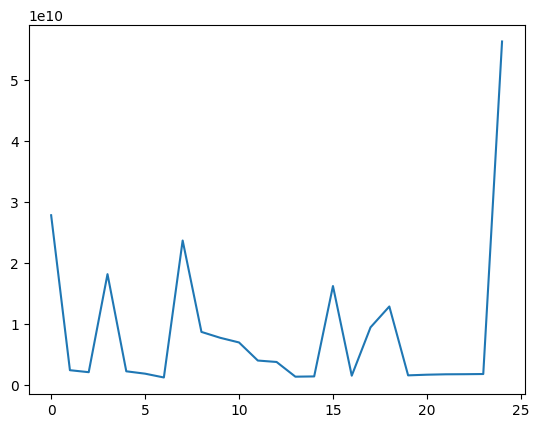

In [109]:
pd_df['sum(quantity)'].plot()

In [110]:
years = to_show[['year']].collect()
sums = to_show[['sum(quantity)']].collect()

In [113]:
years

[Row(year=1990),
 Row(year=1991),
 Row(year=1992),
 Row(year=1993),
 Row(year=1994),
 Row(year=1995),
 Row(year=1996),
 Row(year=1997),
 Row(year=1998),
 Row(year=1999),
 Row(year=2000),
 Row(year=2001),
 Row(year=2002),
 Row(year=2003),
 Row(year=2004),
 Row(year=2005),
 Row(year=2006),
 Row(year=2007),
 Row(year=2008),
 Row(year=2009),
 Row(year=2010),
 Row(year=2011),
 Row(year=2012),
 Row(year=2013),
 Row(year=2014)]

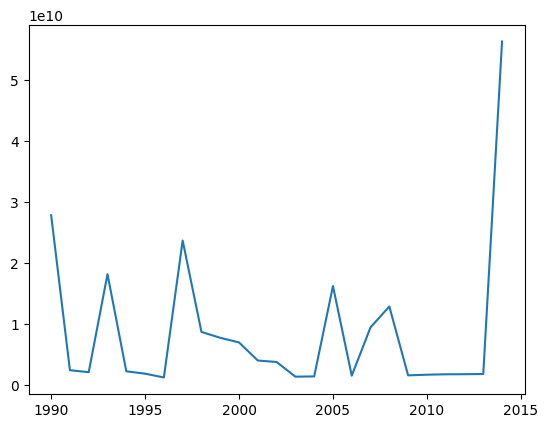

In [114]:
plt.figure()
plt.plot(years, sums)
plt.show()

# Домашнее задание
- Скачайте dataset iris https://drive.google.com/file/d/18ksAxTxBkp15LToEg46BHhwp3sPIoeUU/view?usp=sharing
- Решите домашнее задание - https://colab.research.google.com/drive/1bFOzJNdQzITORtur_m0utqfDJ0QbGe7D?usp=sharing